<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/Clustering_Hierarchical_jadi_car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#sample data
from sklearn.datasets import make_blobs
x1,y1=make_blobs(n_samples=50,centers=[[4,4],[-2,-1],[1,1],[10,4]],cluster_std=0.9)

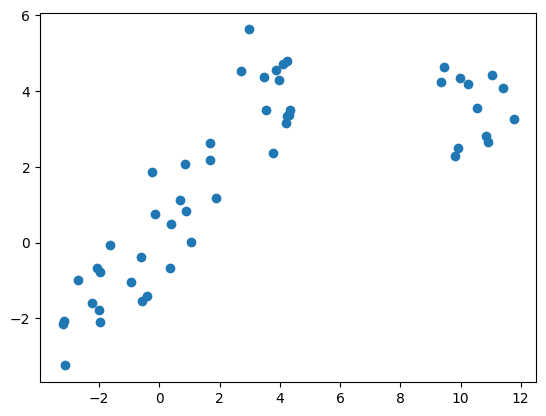

In [ ]:
plt.scatter(x1[:,0],x1[:,1],marker='o')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglom=AgglomerativeClustering(n_clusters=4,linkage='average')
agglom.fit(x1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

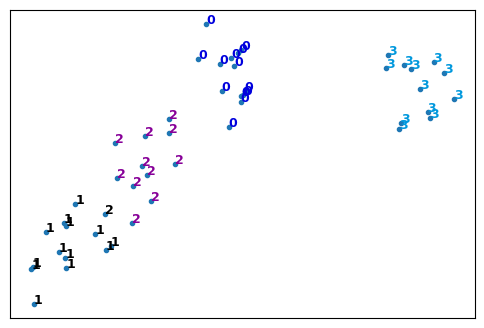

In [ ]:
plt.figure(figsize=(6,4))
x_min,x_max=np.min(x1,axis=0),np.max(x1,axis=0)
x1=(x1-x_min)/(x_max-x_min)
for i in range(x1.shape[0]):
  plt.text(x1[i,0],x1[i,1],str(y1[i]),
  color=plt.cm.nipy_spectral(agglom.labels_[i]/10),
  fontdict={'weight':'bold','size':9})
plt.xticks([])
plt.yticks([])
plt.scatter(x1[:,0],x1[:,1],marker='.')
plt.show()

In [ ]:
#Dendogram
from scipy.spatial import distance_matrix
dist_matrix=distance_matrix(x1,x1)
print(dist_matrix)

[[0.         0.0120376  0.44543482 ... 0.85070108 0.03654795 0.184347  ]
 [0.0120376  0.         0.44947765 ... 0.83877698 0.02453998 0.17483887]
 [0.44543482 0.44947765 0.         ... 1.03330902 0.46048363 0.42694319]
 ...
 [0.85070108 0.83877698 1.03330902 ... 0.         0.81486878 0.69494232]
 [0.03654795 0.02453998 0.46048363 ... 0.81486878 0.         0.15808466]
 [0.184347   0.17483887 0.42694319 ... 0.69494232 0.15808466 0.        ]]


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
z=linkage(dist_matrix,'complete')

<ipython-input-8-fbedd2557c61>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z=linkage(dist_matrix,'complete')


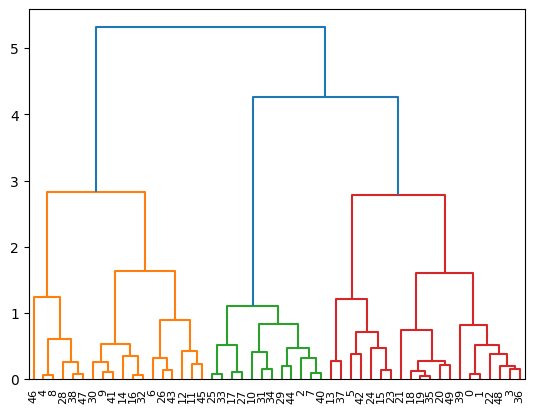

In [ ]:
dendo=dendrogram(z)

Real data set Car

In [ ]:
pdf=pd.read_csv('/content/gdrive/MyDrive/jadi/cars_clus.csv')
pdf.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


The feature sets include price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

In [ ]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [ ]:
pdf.isnull().sum()

manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [ ]:
pdf.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

In [ ]:
pdf.size

2544

In [ ]:
#data cleaning
pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']]=pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric,errors='coerce')
pdf=pdf.dropna()
pdf=pdf.reset_index(drop=True)
pdf.size
pdf.head(5)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [ ]:
# mpg to km(search the furmlua for converting)
pdf['kml']=236.25/pdf['mpg']

In [ ]:
pdf.head(5)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636


In [ ]:
#feature set
fetureset=pdf[['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','kml']]

In [ ]:
#normalization (MinMaxScaler transforms features by scaling each feature to a given range. It is by default (0, 1))
from sklearn.preprocessing import MinMaxScaler
x=fetureset.values#return to numpy
min_max_scaler=MinMaxScaler()
feature_mtx=min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333, 0.30357143],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333, 0.4       ],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333, 0.52272727],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       , 0.33333333],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333, 0.52272727]])

In [ ]:
#clustering using Scipy
#calculate ditance manulaly
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-19-bf57f7d8c4b9>:5: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram
z=complete_clustering=linkage(feature_mtx,method="complete",metric="euclidean")

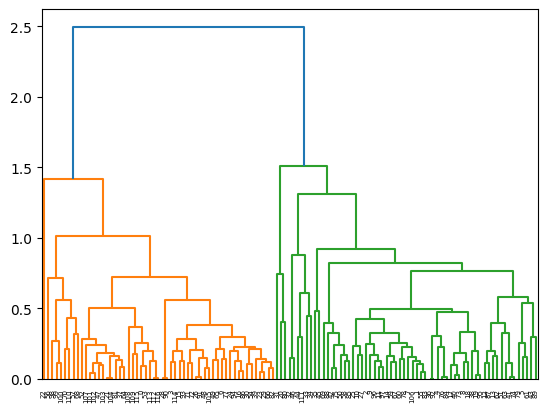

In [ ]:
dendrogram(complete_clustering)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d=5
clusters=fcluster(z,5,criterion='maxclust')
clusters

array([1, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 3, 1,
       2, 1, 1, 5, 1, 5, 1, 1, 1, 3, 4, 4, 4, 5, 5, 1, 5, 1, 5, 5, 5, 5,
       4, 5, 4, 1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 5, 5, 5, 5, 5, 5, 1, 1,
       1, 5, 1, 5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 5, 3, 1, 1, 5, 5, 5, 1, 5,
       5, 5, 1, 1, 5, 1, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1], dtype=int32)

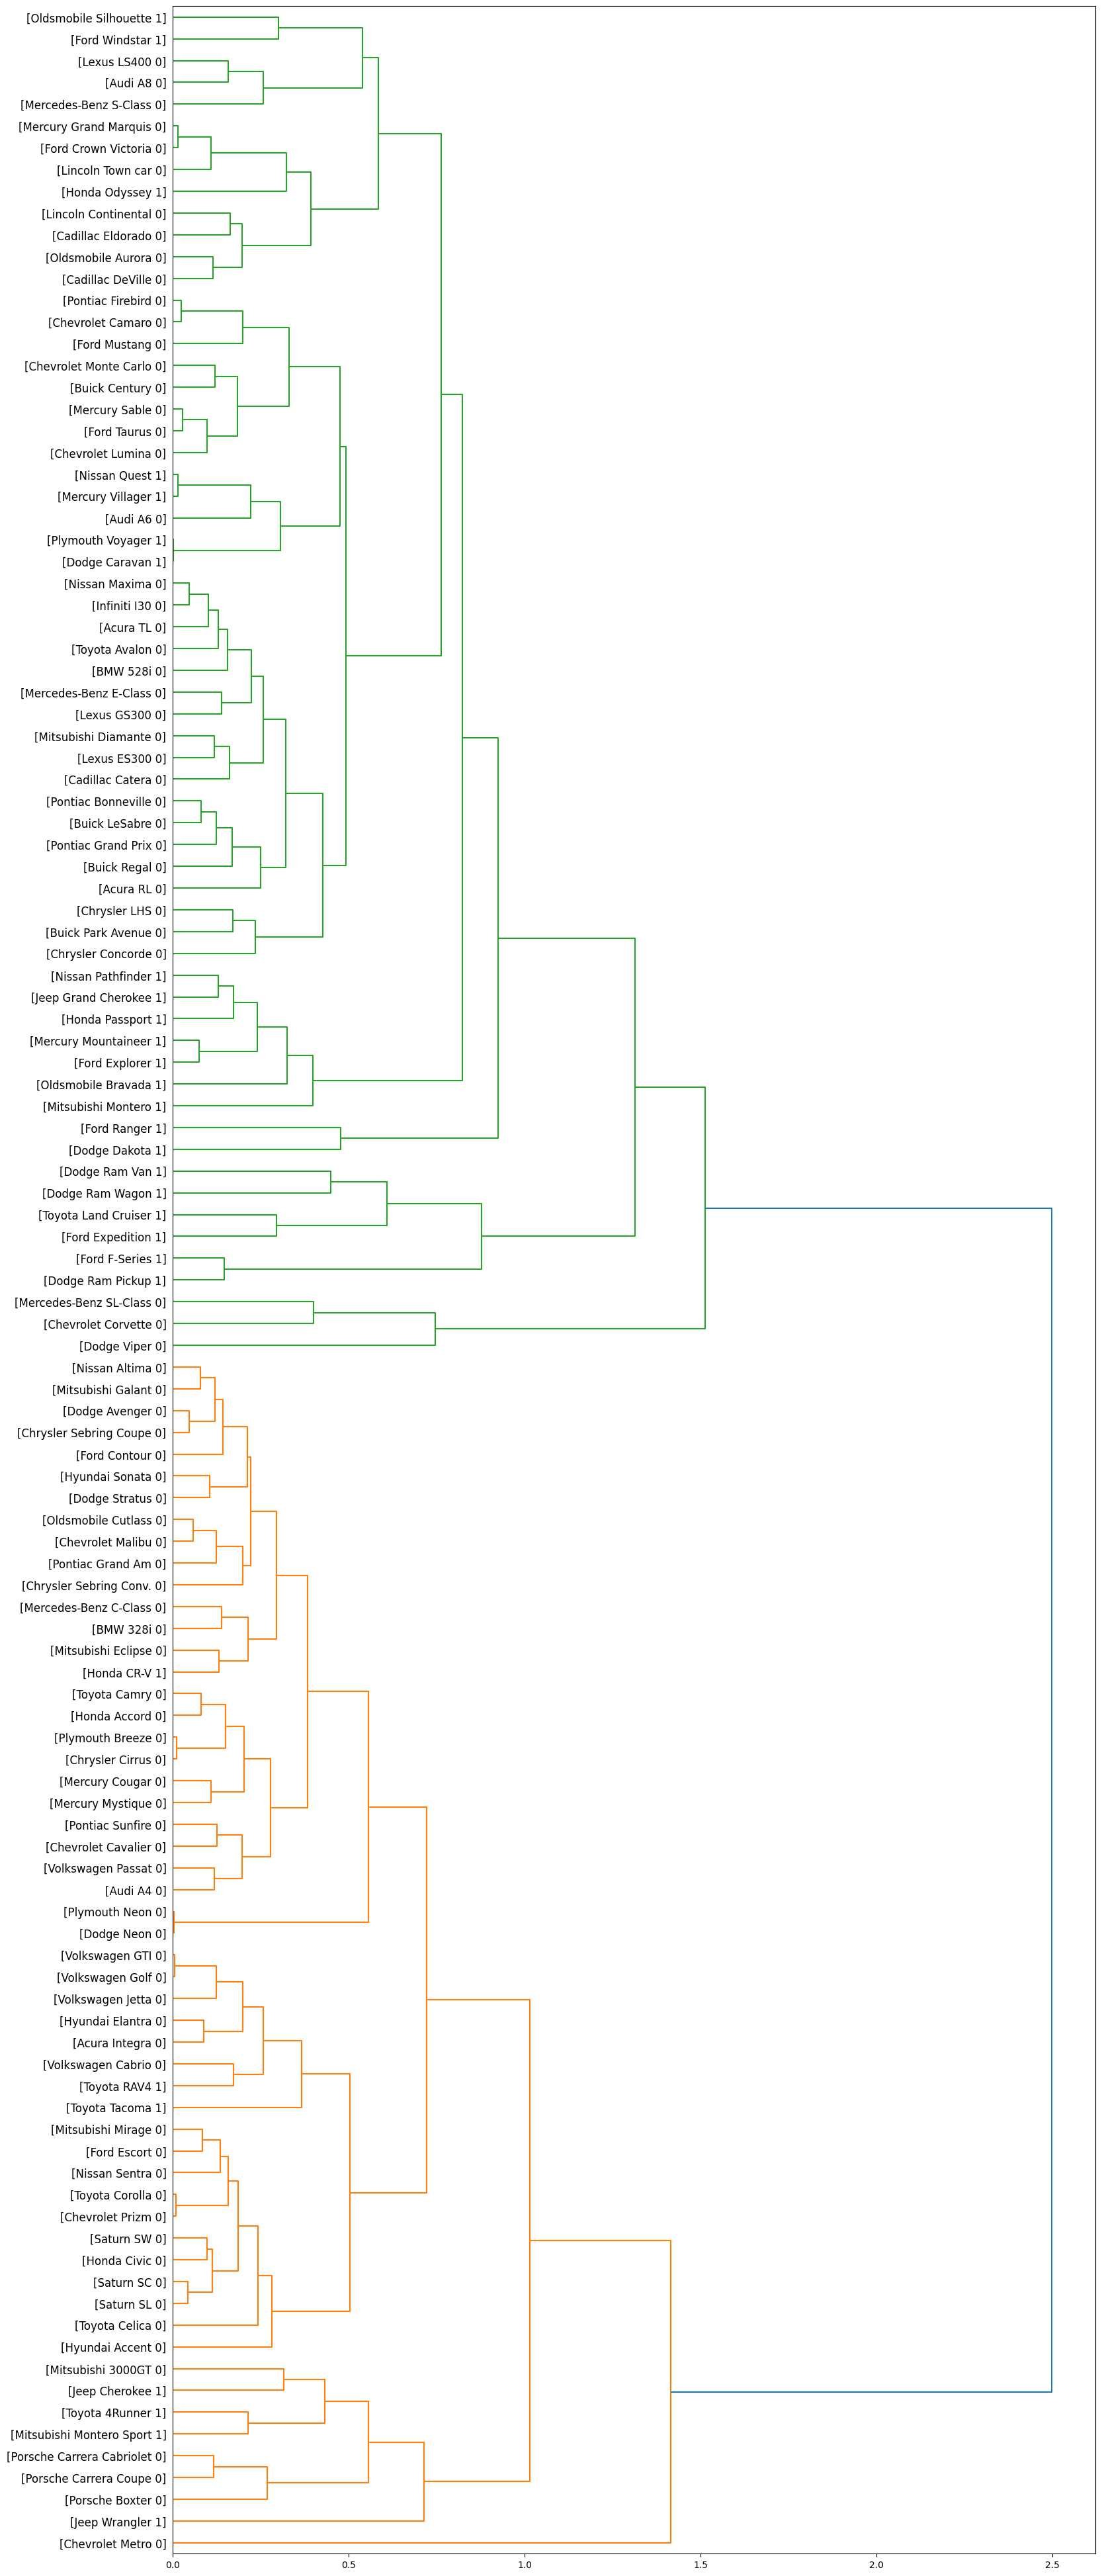

In [ ]:
from matplotlib import pylab
from pylab import *
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro =dendrogram(z,leaf_label_func=llf, leaf_rotation=0,leaf_font_size=12,orientation='right')


Clustering using sckit-learn

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix=euclidean_distances(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.585763   0.78573911 ... 0.28685109 0.25672507 0.19866125]
 [0.585763   0.         0.25892304 ... 0.36698373 0.66436916 0.62297526]
 [0.78573911 0.25892304 0.         ... 0.55085974 0.83285848 0.79502645]
 ...
 [0.28685109 0.36698373 0.55085974 ... 0.         0.41920634 0.35863999]
 [0.25672507 0.66436916 0.83285848 ... 0.41920634 0.         0.15212198]
 [0.19866125 0.62297526 0.79502645 ... 0.35863999 0.15212198 0.        ]]


In [ ]:
z_using_dis_matrix=linkage(dist_matrix,'complete')

<ipython-input-26-46c167c66534>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z_using_dis_matrix=linkage(dist_matrix,'complete')


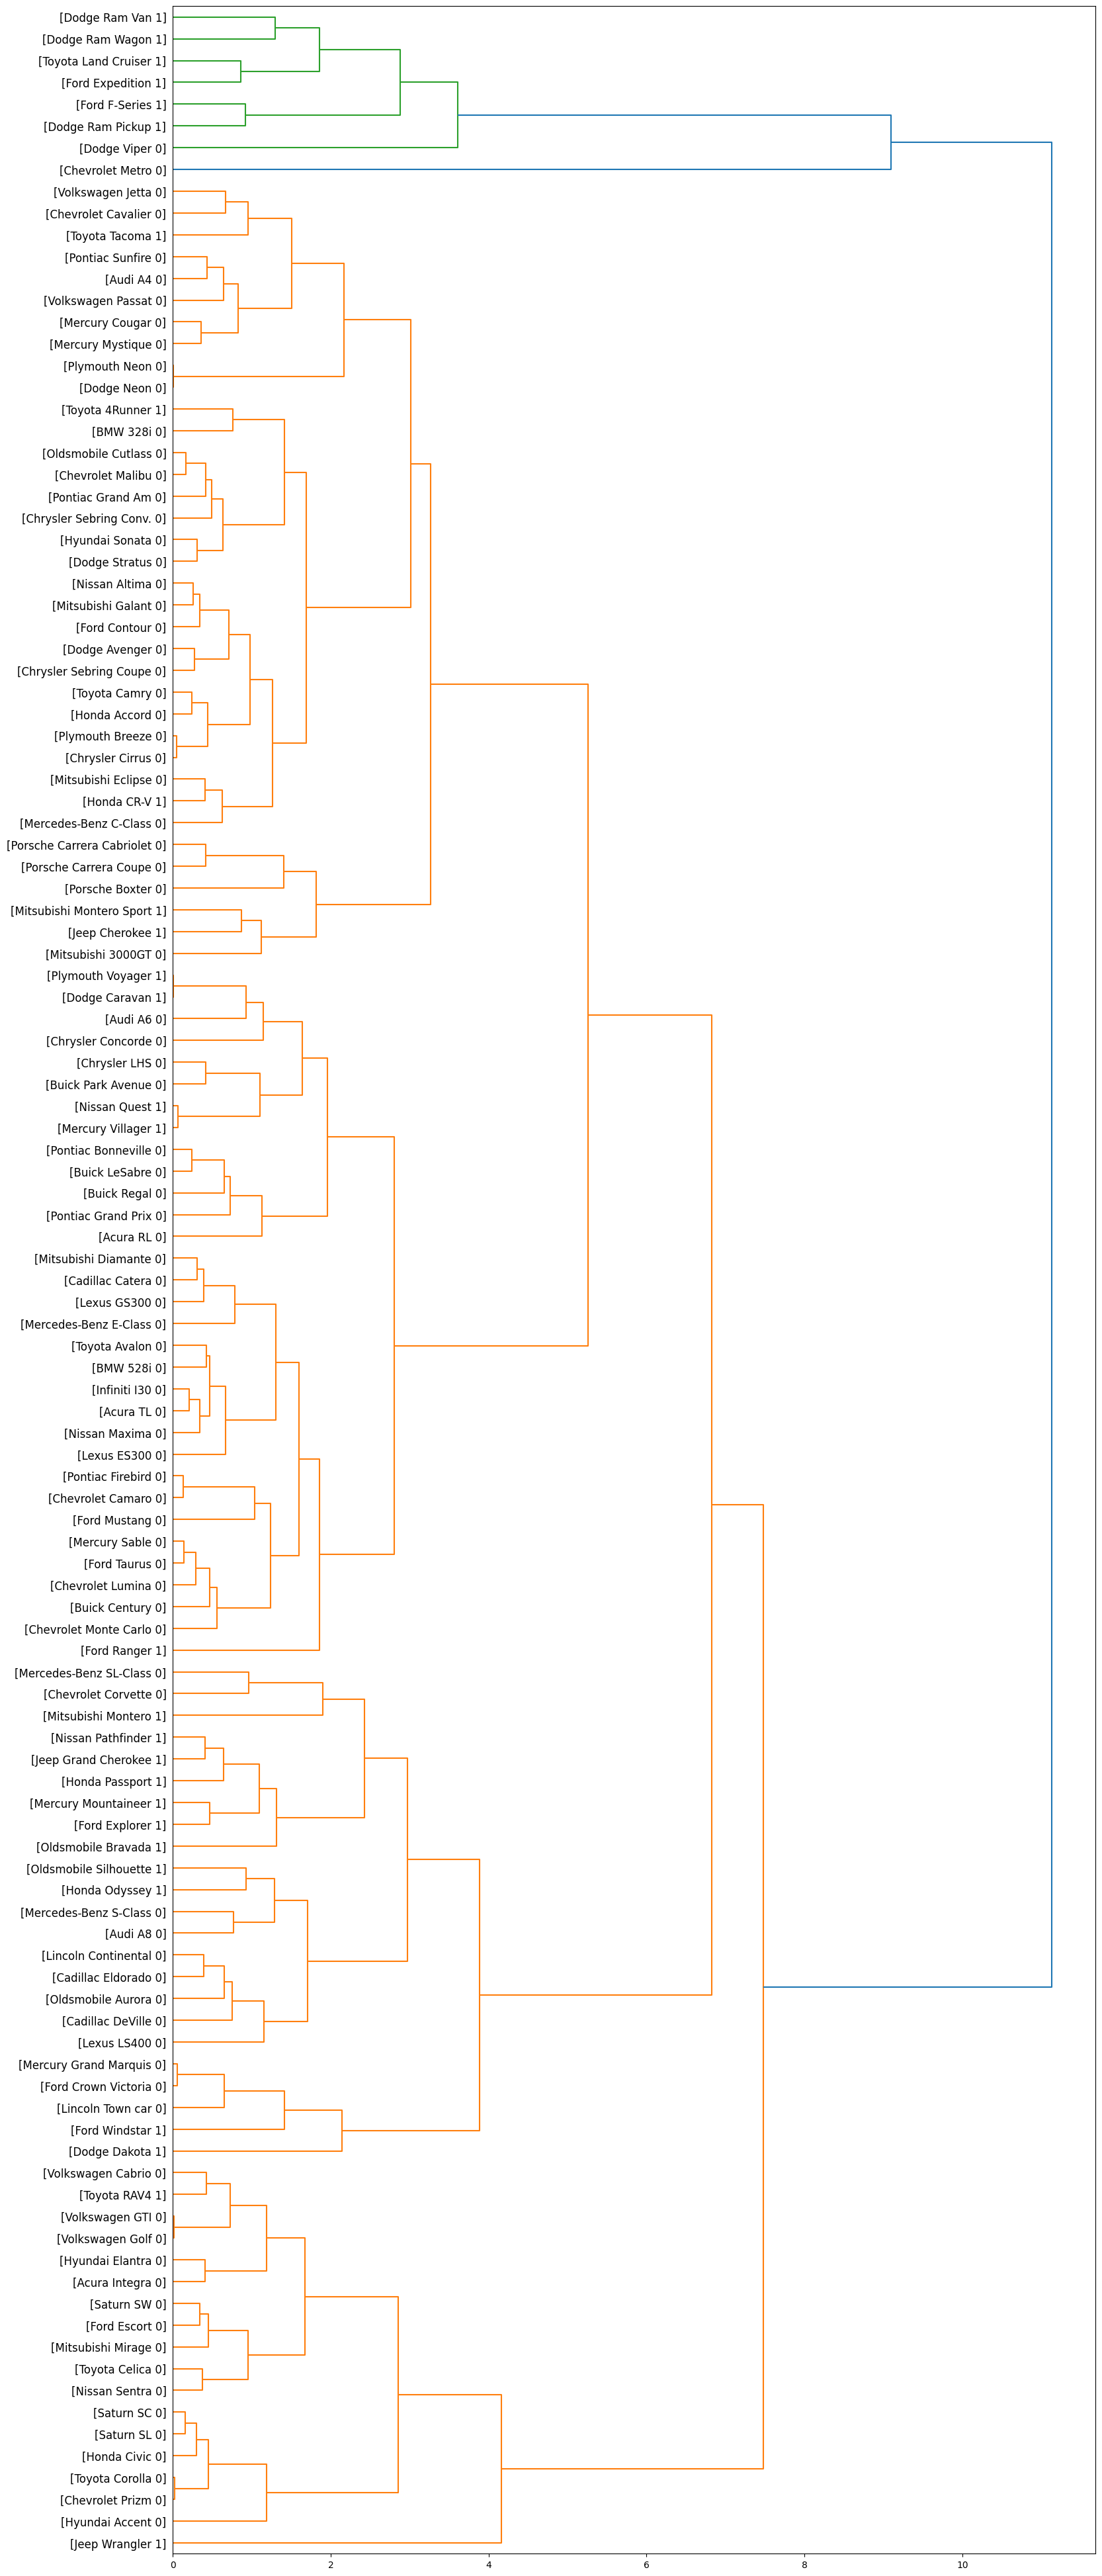

In [ ]:
fig=pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
dendro = dendrogram(z_using_dis_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [ ]:
agglom=AgglomerativeClustering(n_clusters=6,linkage='complete')
agglom.fit(dist_matrix)
agglom.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 2, 2, 4, 2, 1, 4, 2, 2, 2, 2, 2, 1, 1, 2, 4, 4, 2, 2, 2, 1, 0,
       5, 4, 4, 2, 4, 2, 4, 4, 4, 3, 3, 3, 3, 1, 2, 0, 2, 4, 2, 1, 1, 1,
       3, 2, 3, 0, 4, 4, 1, 1, 0, 0, 4, 2, 0, 4, 1, 2, 2, 1, 1, 1, 0, 4,
       4, 2, 4, 1, 4, 4, 4, 2, 1, 1, 2, 4, 2, 1, 1, 0, 4, 2, 2, 1, 4, 1,
       1, 1, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 0, 0, 0, 0, 4, 2, 0, 4, 0,
       4, 3, 0, 4, 4, 0, 0])

In [ ]:
pdf['cluster_']=agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,kml,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,8.437500,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,9.450000,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,10.738636,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,8.750000,4
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,10.738636,2


[0.5 0.  1.  1. ] 0
[0.1        0.58778525 0.95105652 1.        ] 1
[0.3        0.95105652 0.80901699 1.        ] 2
[0.7        0.95105652 0.58778525 1.        ] 3
[1.         0.58778525 0.30901699 1.        ] 4
[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0000000e+00] 5


<ipython-input-39-e1153a6ff4dc>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.kml, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'kml')

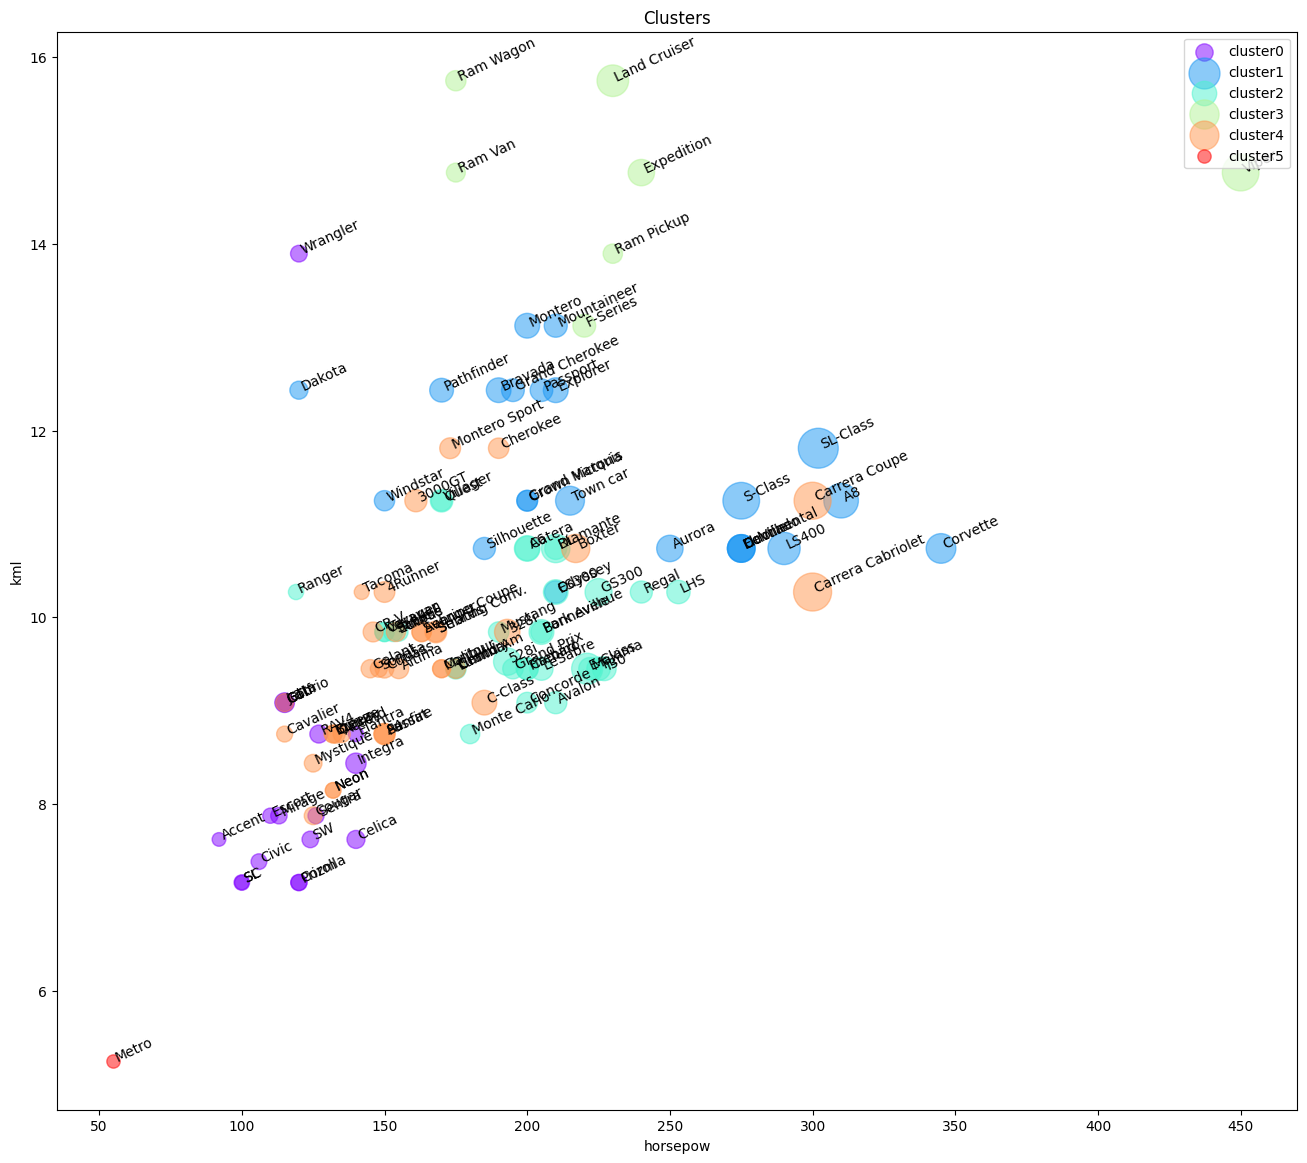

In [ ]:
import matplotlib.cm as cm
n_clusters=max(agglom.labels_)+1
colors=cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels=list(range(0,n_clusters))
plt.figure(figsize=(16,14))
for color,label in zip(colors,cluster_labels):
  print(color,label)
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
            plt.text(subset.horsepow[i], subset.kml[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.kml, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('kml')

In [ ]:
#truck:1 car:0
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     16
          1.0      2
1         0.0     12
          1.0     11
2         0.0     27
          1.0      5
3         0.0      1
          1.0      6
4         0.0     31
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [ ]:
agg_cars=pdf.groupby(['cluster_','type'])['horsepow','engine_s','kml','price'].mean()
agg_cars

<ipython-input-42-299ca751beb0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars=pdf.groupby(['cluster_','type'])['horsepow','engine_s','kml','price'].mean()


horsepow  engine_s        kml      price
cluster_ type                                            
0        0.0   117.250000  1.850000   7.934637  14.330125
         1.0   123.500000  2.250000  11.323529  15.674000
1        0.0   267.666667  4.566667  11.041193  46.417417
         1.0   185.909091  3.518182  12.101422  26.856727
2        0.0   203.111111  3.303704   9.785538  27.750593
         1.0   151.800000  2.780000  10.491848  19.874800
3        0.0   450.000000  8.000000  14.765625  69.725000
         1.0   211.666667  4.483333  14.675551  29.024667
4        0.0   161.645161  2.451613   9.338760  23.390516
         1.0   160.200000  2.820000  10.802446  19.702600
5        0.0    55.000000  1.000000   5.250000   9.235000

<ipython-input-43-b802334e3927>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.kml, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'kml')

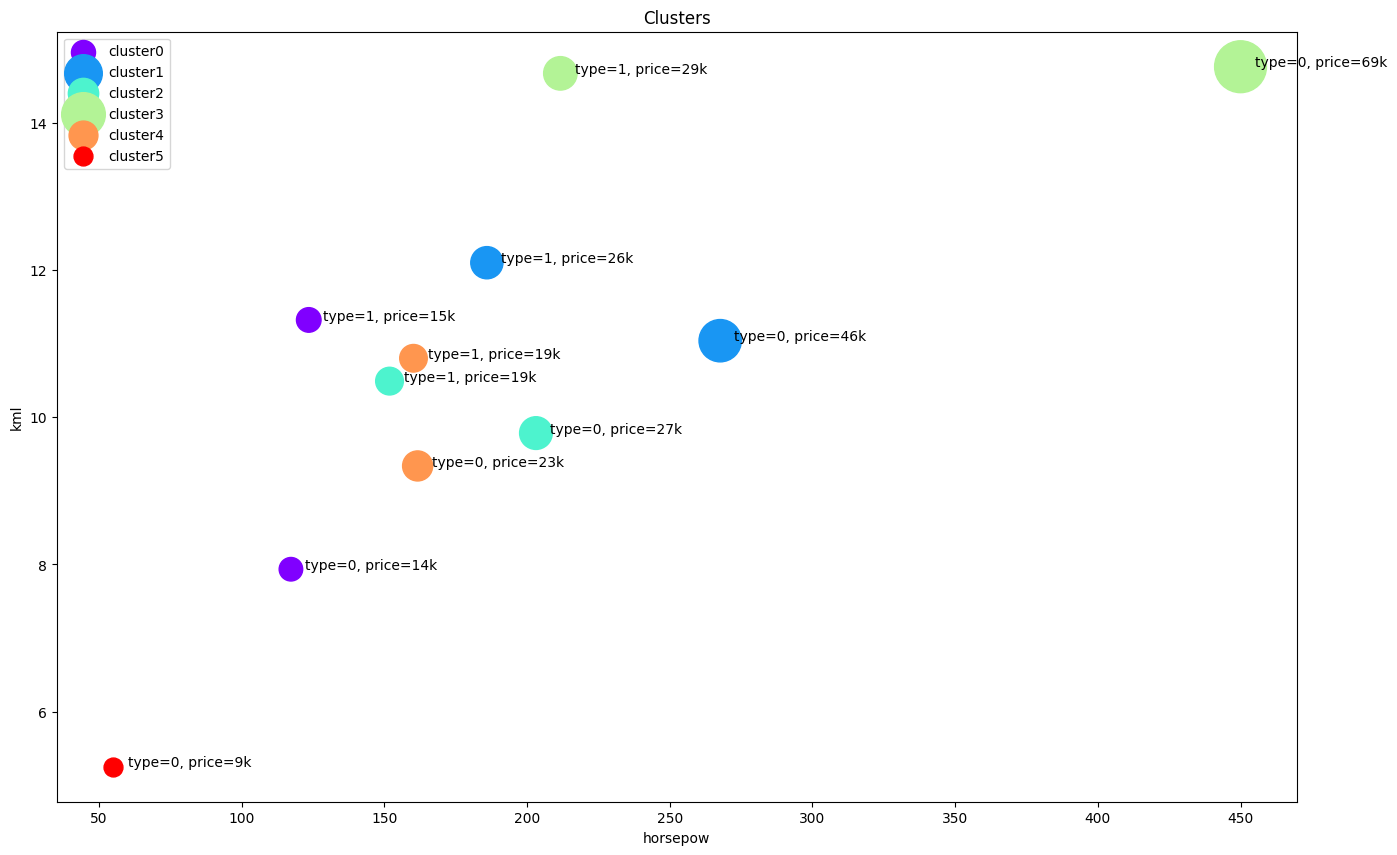

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.kml, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('kml')